In [1]:
## Libreria de control
try:
  from control.matlab import *
except:
  !pip install control
  from control.matlab import *
    
## Libreria para graphicar
import matplotlib.pyplot as plt
import numpy

## Libreria para calculo simbolico
import sympy

## Libreria de control
import control

## Libreria para widgets
import ipywidgets as widgets

## Libreria para animaciones
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"#"jshtml"

## Libreria para importar Iframe de Youtube
from IPython.display import IFrame

# Sistemas híbridos
_como combinar la naturaleza discreta en modelos_

[tomado del curso robótica móvil](https://www.classcentral.com/course/conrob-404)

# Suiches en todas partes 

Hasta el momento hemos estudiado modelos que se mantienen igual durante el tiempo. **Lo que no es verdad.**

Hemos diseñado controladores que sirven para todos los propositos. **No es verdad en robótica.**

Recordemos el enfoque de control basado en comportamiento. Necesitamos ser capaces de lidiar con todos estos tipos de fenomenos. 

# Los suiches aparecen como una necesidad

Las condiciones en el mundo real cambián todo el tiempo. 

- Caminar
- El rebote de una pelota

# Los suiches aparecen por diseño

Realizar cambio en la manera como funcionan las cosas mejora su desempeño.

- Caja de cambios
- Diferente juego de engranes

# Problemas que aparecen a tener suiches

- ¿Cómo podemos crear estos modelos?
- ¿Son estables y tiene buen desempeño? 
- ¿Podemos diseñar dichos sistemas? 
- ¿Hay trampas? 

# Automatas híbridos

Necesitamos describir sistemas que contienen ambos mundos, la dinámica del sistema continuo y los cambios de la lógica discreta. 

Un automata híbrido es:

**Una máquina de estados finitos (lógica discreta) que incluye dinámica continua**

# Modos, transiciones, guardias y resets

- Supongamos un estado continuo para el sistema $x$ y como estaremos cambiando entre diferentes modos de operacion agreguemos un estado discreto $q$. La dinámica entonces será:

$$\dot{x}=f_q(x,u)$$

- La transicion entre diferente modos discretos puede ser representada como una maquina de estados finitos.

![](simple-fem.png)

# Modos, transiciones, guardias y resets

- La condiciones en la cuales ocurre una transición la llamamos condición, ejemplo: una transición de $q$ a $q'$ ocurre si:
    
    $$x\in G_{q,q'}$$

- Como componente final, vamos a permitir cambios radicales/abruptos en los estados mientras la transición ocurre, esto son llamads reset:

    $$x:=R_{q,q'}(x)$$

# Modelo de los automatas híbridos

- Poniendo todo en conjunto obtenemos una respresentación muy rica del modelo, que se conoce como un automatata híbrido. 

![](primer-automata-hibrido.png)

# Ejemplo del modelo de temperatura de un salón

![](ah-temperatura.png)

# Ejemplo del modelo de una caja de cambios

![](ah-caja-cambios.png)

# Ejemplo de un modelo basado en comportamiento

![](ah-comportamiento.png)

# ¿ Qué puede salir mal cuando empezamos a cambiar entre diferentes controladores ?

# Un sencillo sistema con dos modos

$$\dot{x}=A_1\,x=\left[\array{-\epsilon&1\\-2&-\epsilon}\right]x$$
$$\dot{x}=A_2\,x=\left[\array{-\epsilon&2\\-1&-\epsilon}\right]x$$

$$\text{eig}(A_i)=-\epsilon\pm1.41j$$

- Ambos modos son asintóticamente estables. 

## Modo 1

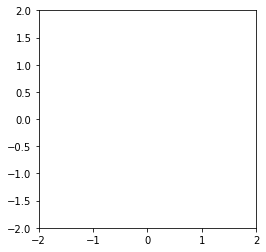

In [2]:
T   = numpy.linspace(0, 20, 201)
dt  = 0.1

e = 0.05
A1 = numpy.array([[-e,1],[-2,-e]])
A2 =numpy.array([[-e,2],[-1,-e]])
B = numpy.zeros([2,1])
C = numpy.eye(2)
D = numpy.zeros([2,1])

#####
sys1 = ss(A1, B, C, D)
Y1,T = step(sys1,X0=numpy.array([[1],[1]]),T=T)

fig, ax = plt.subplots();

m, = ax.plot(Y1[0,0],Y1[0,1])
plt.xlim(-2,2)
plt.ylim(-2,2)
ax.set_aspect('equal', 'box')

def animate(i):
    m.set_data(Y1[0:i,0],Y1[0:i,1])

ani = FuncAnimation(fig, animate, frames=len(T), interval=1000/10);

In [3]:
display(ani)

## Modo 2

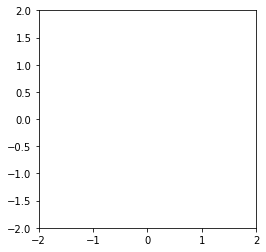

In [4]:
sys2 = ss(A2, B, C, D)
Y2,T = step(sys2,X0=numpy.array([[1],[1]]),T=T)

fig, ax = plt.subplots();

m, = ax.plot(Y2[0,0],Y2[0,1])
plt.xlim(-2,2)
plt.ylim(-2,2)
ax.set_aspect('equal', 'box')

def animate(i):
    m.set_data(Y2[0:i,0],Y2[0:i,1])

ani = FuncAnimation(fig, animate, frames=len(T), interval=1000/10);

In [5]:
display(ani)

# Automata Híbrido 1

![](7-ejemplo-ha-1.png)

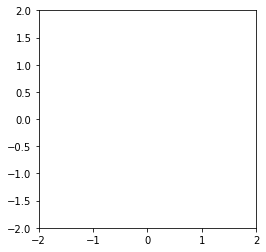

In [6]:
x   = numpy.array([[1],[1]])
YHA1= numpy.array([[1,1]])
A   = A1
for t in T:
    x = x + dt*numpy.matmul(A,x)
    YHA1 = numpy.concatenate((YHA1, x.T), axis=0)
    if(numpy.sign(YHA1[-1,1])!=numpy.sign(YHA1[-2,1])):
        A = A2
    if(numpy.sign(YHA1[-1,0])!=numpy.sign(YHA1[-2,0])):
        A = A1

fig, ax = plt.subplots();

m, = ax.plot(YHA1[0,0],YHA1[0,1])
plt.xlim(-2,2)
plt.ylim(-2,2)
ax.set_aspect('equal', 'box')

def animate(i):
    m.set_data(YHA1[0:i,0],YHA1[0:i,1])

ani = FuncAnimation(fig, animate, frames=len(T), interval=1000/10);

In [7]:
display(ani)

# Automata Híbrido 2

![](7-ejemplo-ha-2.png)

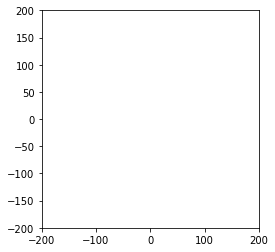

In [8]:
x   = numpy.array([[1],[1]])
YHA2= numpy.array([[1,1]])
A   = A1
for t in T:
    x = x + dt*numpy.matmul(A,x)
    YHA2 = numpy.concatenate((YHA2, x.T), axis=0)
    if(numpy.sign(YHA2[-1,0])!=numpy.sign(YHA2[-2,0])):
        A = A2
    if(numpy.sign(YHA2[-1,1])!=numpy.sign(YHA2[-2,1])):
        A = A1

fig, ax = plt.subplots();

m, = ax.plot(YHA2[0,0],YHA2[0,1])
plt.xlim(-200,200)
plt.ylim(-200,200)
ax.set_aspect('equal', 'box')

def animate(i):
    m.set_data(YHA2[0:i,0],YHA2[0:i,1])

ani = FuncAnimation(fig, animate, frames=len(T), interval=1000/10);

In [9]:
display(ani)

# Resumen

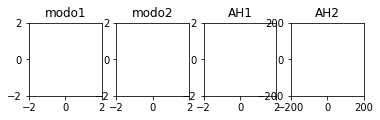

In [10]:
fig, axs = plt.subplots(1, 4)



m1, = axs[0].plot(Y1[0,0],Y1[0,1])
axs[0].set_aspect('equal', 'box')
axs[0].set(xlim=(-2, 2), ylim=(-2, 2))
axs[0].set_title('modo1')
m2, = axs[1].plot(Y2[0,0],Y2[0,1])
axs[1].set_aspect('equal', 'box')
axs[1].set(xlim=(-2, 2), ylim=(-2, 2))
axs[1].set_title('modo2')
m3, = axs[2].plot(YHA1[0,0],YHA1[0,1])
axs[2].set_aspect('equal', 'box')
axs[2].set(xlim=(-2, 2), ylim=(-2, 2))
axs[2].set_title('AH1')
m4, = axs[3].plot(YHA2[0,0],YHA2[0,1])
axs[3].set_aspect('equal', 'box')
axs[3].set(xlim=(-200, 200), ylim=(-200, 200))
axs[3].set_title('AH2')

def animate(i):
    m1.set_data(Y1[0:i,0],Y1[0:i,1])
    m2.set_data(Y2[0:i,0],Y2[0:i,1])
    m3.set_data(YHA1[0:i,0],YHA1[0:i,1])
    m4.set_data(YHA2[0:i,0],YHA2[0:i,1])

ani = FuncAnimation(fig, animate, frames=len(T), interval=1000/10);

In [11]:
display(ani)

# Anotar

- Combinando modos estables, el resultado del sistema híbrido puede ser inestable. 
- Combinando modos inestables, el resultado del sistema híbrido puede ser estable. 
- Diseña modos estables pero ten cuidado del riesgo de transforma el sistema híbrido en un sistema inestable. 

# Hay Peligros

Subsistemas estables no garantizan que el sistema híbrido sea estable. 

# Sistemas suicheado

Vimos que podemos destabilizar subsistemas estables a traves de una desafortunada serie de suiches

Si ignoramos los _resets_ podemos escribir los sistemas híbridos como sistemas suicheados:

$$\dot{x}=f_\sigma(x,u)$$

donde $\sigma$ es la señal de suicheado

La señal de suicheado dicta in que modo discreto nos encontramos. 

$$\sigma(t) \in \Sigma = \{1,\ldots \,,p\}$$

# Diferentes tipos de estabilidad

Dado un sistema suicheado $\dot{x}=f_\sigma(x,u)$ tendremos estabilidad:

- **universal**, asintoticamente estable:
    $$x \to 0, \forall\sigma$$
- **existencial**, asintoticamente estable:
    $$\exists \sigma \quad\text{s.t.}\quad x\to 0$$
    
Si la señal de suicheado es generada por un automata híbrido:

- **híbrida**, asintoticamente estable:
    $$x\to 0$$

# Algunas consideraciones

Si todos los modos son _AS_ entonces:

- Tendremos un sistema existencialmente _AS_, ya que podemos escoger un modo y no cambiamos!
- No siempre sera universalmente _AS_, vimos un contraejemplo. 

## Recomendaciones

- Diseñar controladores estables para los subsistemas.
- Diseña la logica suicheada en el automata híbrido.
- Esta pendiente de las posibilidades de inestabilidad y probar, probar y probar. 

# El modelo de la pelota que rebota en una superficie

La ecuación del movimiento entre rebotes es:

$$\ddot{h}=-g$$

$$\dot{x}=\left[\array{0&1\\0&0}\right]x + \left[\array{0\\-g}\right] \qquad y = \left[\array{1&0}\right] x$$

Los rebotes pueden ser modelados como _resets_:

$$\dot{h}:= - \gamma \dot{h}$$

$$x:=\left[\array{1&0\\0&-\gamma}\right]x$$

# El automata híbrido de la pelota

![](ha-pelota.png)

$$A=\left[\array{0&1\\0&0}\right] \qquad
B=\left[\array{0\\-g}\right] \qquad 
R=\left[\array{1&0\\0&-\gamma}\right]$$

Cuál sería la condición o guardia ?

- $h\leq0 \to  \left[\array{1&0}\right] x \leq0$
- $h\leq0 \:\text{y}\: \dot{h}\leq0 \to  x \leq 0$

# Resolviendo el sistema

Partiendo del sistema

$$\dot{x}=\left[\array{0&1\\0&0}\right]x + \left[\array{0\\-g}\right] \qquad y = \left[\array{1&0}\right] x$$

y recordando la solución general para la ecuación en espacio de estados:

$$y=C\Phi(t,t_0)x(t_0) + C\int_{t_0}^t \Phi(t,\tau)Bu(\tau) d\tau \qquad \Phi(t,\tau)=e^{A(t-\tau)}$$

Analizando la matriz dinámica de este sistema tenemos:

$$A^2 = A^3 = \ldots = 0$$

luego:

$$e^{At} = \sum_{k=0}^\infty \frac{At^k}{k!} = I + At + 0 = \left[\array{1&t\\0&1}\right]$$

# Resolviendo el sistema

$$y=C\Phi(t,t_0)x(t_0) + C\int_{t_0}^t \Phi(t,\tau)Bu(\tau) d\tau \qquad \Phi(t,\tau)=e^{A(t-\tau)}$$

remplazamos:

$$y=\left[\array{1&0}\right]\left[\array{1&t-t_0\\0&1}\right]\left[\array{h_0\\ \dot{h}_0}\right] + \left[\array{1&0}\right]\int_{t_0}^t \left[\array{1&t-\tau\\0&1}\right]\left[\array{0\\-g}\right] d\tau$$

integrando:

$$y = h_0 + \dot{h}_0(t-t_0) - \frac{g}{2}(t-t_0)^2$$

# Tiempo entre rebotes

Partiendo de la solución y teniendo las condiciones $h_0=0$ y $t_0=0$

$$y = h_0 + \dot{h}_0(t-t_0) - \frac{g}{2}(t-t_0)^2$$

El tiempo para un primer rebote será:

$$y(T)=0 = \dot{h}_0T - \frac{g}{2}T^2 = T \left(\dot{h}_0 - \frac{g}{2}T\right)$$

solución:

$$T=0 \qquad T = \frac{2\dot{h}}{g}$$

El tiempo entre rebotes será : $T = \frac{2\dot{h}}{g}$

# Tiempo acumulado

Siendo $\gamma$ la fracción de energía recuperada por el sistema en el rebote tendremos y $v=\dot{h}_0$ la velocidad inicial, para los tiempos de los rebotes. 

$$\array{T_1 =& 2v/g \\ T_2=& 2v/g&+\gamma 2v/g}$$

Luego para el rebote $N$ tendremos :

$$T_N = \frac{2v}{g}\sum_{k=0}^{N-1}\gamma^k = \frac{2v}{g}\frac{1}{1-\gamma} \qquad \gamma<1$$

# Rebotes infinito en tiempo finito

$$T_\infty = \frac{2v}{g}\frac{1}{1-\gamma} < \infty$$

La pelota rebota infinitas veces en tiempo finito. Esto es más que una curiosidad matemática. 

- La simulaciones explotan.
- Los sistemas híbrido quedan indefinido despues de ese momento. 

Este hecho se conoce como el fenómemo de Zenón.


# El fenómeno/paradoja de Zenón

Zenón de Elea (490ac-430ac)

<img src="zeno-paradox.png" width="300px"/>

"In a race, the quickest runner can never over take the slowest, since the pursuer must first reach the point whence the pursued started, so that the slower must always hold a lead." — as recounted by Aristotle, Physics VI:9, 239b15

- La paradoja : Aquiles nunca alcanza a la tortuga.
- La solución : La convergencia de la situación.
- El problema : Se generan infinitos suiches en tiempo finito. 

# Ejemplo 

$$\dot{x}=\cases{-1& x > 0\\+1& x < 0}$$

![](ejemplo-suicheo-infinito.png)

- Este sistema suichea infinitamente muchas veces en un solo instante de tiempo
- Zeno: Infinitos cambios en tiempo finito. 
    - Tipo 1: En un solo instante
    - Tipo 2: No tipo 1 (rebote de una pelota)

# Buenas y malas noticias

- Zeno es un problema
- Zeno Tipo 1 no es solo detectable, sino que que podemos lidiar con él de manera directa.
- Zeno Tipo 2 es en general difícil de manejar. 

# Control modo deslizante 

![](ejemplo-suicheo-infinito.png)

Para evitar los suicheo infinitos usaremos un control modo deslizante.

# Superficie de deslizamiento

![](control-modo-deslizante.png)

# Deslizamiento

![](deslizamiento.png)

El deslizamiento ocurre cuando:

$$\frac{\partial g}{\partial x}f_1 < 0 \qquad\text{y}\qquad \frac{\partial g}{\partial x}f_2 > 0 $$

La derivada de $g$ in la dirección $f$ se conoce como la derivada de Lie $L_fg$

# Probando el Zeno tipo 1

Podemos saber si tenemos zeno tipo 1 si ocurre el deslizamiento:


$$\frac{\partial g}{\partial x}f_1 < 0 \qquad\text{y}\qquad \frac{\partial g}{\partial x}f_2 > 0 $$

o escrito de otra forma

$$L_{f_1} g < 0 \qquad\text{y}\qquad L_{f_2} g > 0 $$

# Regularización

![](regularizacion.png)

# Modo Deslizante

El modo deslizante se da cuando $dg/dt = 0$, luego

$$\frac{dg}{dt} = \frac{\partial g}{\partial x} \dot{x} = \frac{\partial g}{\partial x}\left(\sigma_1f_1+\sigma_2f_2\right) = \sigma_1L_{f_1}g+\sigma_2L_{f_2}g$$

de aquí:

$$\sigma_2 = -\sigma_1 \frac{L_{f_1}g}{L_{f_2}g}$$

con lo anterior podemos calcular los valores $\sigma_1$ y $\sigma_2$ del modo deslizante. Teniendo en cuenta que:

$$\array{\sigma_1,\sigma_2 \geq 0 &\text{y}& \sigma_1+\sigma_2 = 1}$$

# Modo inducido

De las ecuaciones anteriores podemos definir:

$$\sigma_2 = -\sigma_1 \frac{L_{f_1}g}{L_{f_2}g}$$

$$\sigma_1+\sigma_2 = \sigma_1 \left(1-\frac{L_{f_1}g}{L_{f_2}g}\right)= 1$$

de aquí:

$$\array{\sigma_1 = \frac{L_{f_2}g}{L_{f_2}g-L_{f_1}g}&&\sigma_2 = -\frac{L_{f_1}g}{L_{f_2}g-L_{f_1}g}}$$

el modo inducido será:

$$\dot{x} = \frac{1}{L_{f_2}g-L_{f_1}g}\left(L_{f_2}g\,f_1-L_{f_1}g\,f_2\right)$$

# Regularización de Zeno tipo 1

<img src="ha-con-regularizacion.png"/>